# Gradient Descent

gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [77]:
import numpy as np
import matplotlib.pyplot as plt

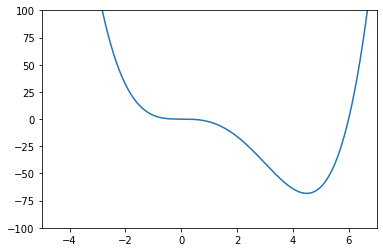

In [78]:
x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))

In [79]:
x = 5
x_old = 2
eps = 0.01
precision = 0.000001 

def fp(x):
    return 2*x**3-9*x**2

In [80]:
while (abs(x - x_old)>precision):
    x_old = x
    x = x_old - eps*fp(x_old)
print("최저점 : ",x)

최저점 :  4.50000135784093


# Diabetes (regression)

다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.


1. sklearn을 이용하지 않고 (자신의 코드로)

In [81]:
from sklearn import datasets

In [82]:
diabetes=datasets.load_diabetes()

In [83]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [84]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [85]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

Text(0.5, 1.0, 'age')

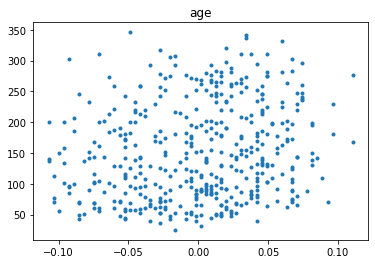

In [86]:
plt.plot(X_age,Y,".")
plt.title("age")

Text(0.5, 1.0, 'bmi')

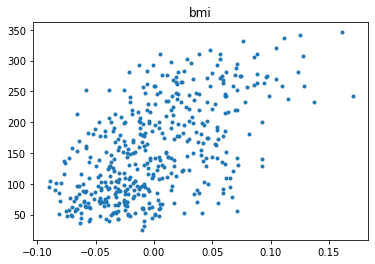

In [87]:
plt.plot(X_bmi,Y,".")
plt.title("bmi")

Text(0.5, 1.0, 'dp')

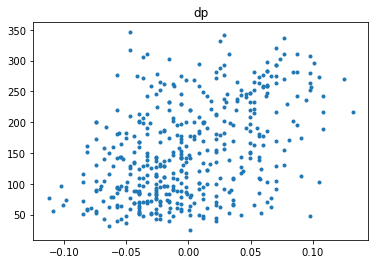

In [88]:
plt.plot(X_p,Y,".")
plt.title("dp")

In [89]:
def lin(a,b,x):
    return a*x+b
def MSE(a,b,x,y):
    f=a*x+b
    return np.mean((f-y)**2)

In [111]:
a,b,c,d,e,f=1,1,1,1,1,1
eps=1

In [115]:
for i in range(100000):

    if MSE(a+eps,d,X_age,Y)>MSE(a-eps,b,X_age,Y):
        a-=eps
    else: a+=eps

    if MSE(a,b+eps,X_age,Y)>MSE(a,b-eps,X_age,Y):
        b-=eps
    else: b+=eps

    if MSE(c+eps,d,X_bmi,Y)>MSE(c-eps,d,X_bmi,Y):
        c-=eps
    else: c+=eps

    if MSE(c,d+eps,X_bmi,Y)>MSE(c,d-eps,X_bmi,Y):
        d-=eps
    else: d+=eps

    if MSE(e+eps,f,X_p,Y)>MSE(e-eps,f,X_p,Y):
        e-=eps
    else: e+=eps

    if MSE(e,f+eps,X_p,Y)>MSE(e,f-eps,X_p,Y):
        f-=eps
    else: f+=eps

In [113]:
a,b,c,d,e,f

(305, 153, 949, 153, 715, 153)

Text(0.5, 1.0, 'dp')

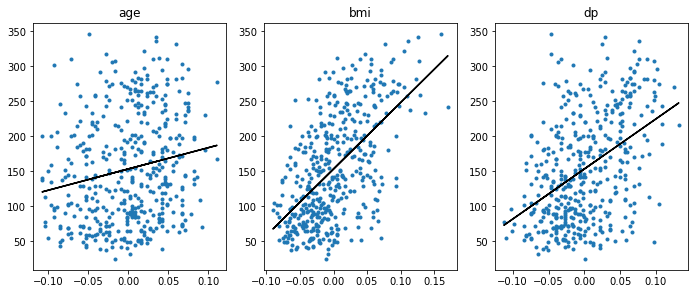

In [118]:
plt.figure(figsize=(20,10))

plt.subplot(251)
plt.plot(X_age,Y,".")
plt.plot(X_age,lin(a,b,X_age),'k')
plt.title("age")

plt.subplot(252)
plt.plot(X_bmi,Y,".")
plt.plot(X_bmi,lin(c,d,X_bmi),'k')
plt.title("bmi")

plt.subplot(253)
plt.plot(X_p,Y,".")
plt.plot(X_p,lin(e,f,X_p),'k')
plt.title("dp")



## 2. sklearn 이용

In [94]:
from sklearn.linear_model import LinearRegression

In [120]:
L=[X_age,X_bmi,X_p]
l=['age','bmi','dp']
for j,i in enumerate(L):
    f= LinearRegression()
    f.fit(i.reshape(-1,1),Y)
    print(f' <{l[j]}>  기울기: {f.coef_[0]} 절편: {f.intercept_} \n ')

 <age>  기울기: 304.1830745282948 절편: 152.13348416289605 
 
 <bmi>  기울기: 949.4352603839491 절편: 152.1334841628967 
 
 <dp>  기울기: 714.7416437042881 절편: 152.13348416289585 
 


Text(0.5, 1.0, 'age')

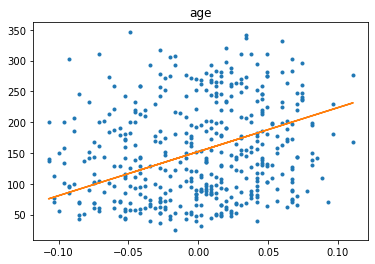

In [96]:
plt.plot(X_age,Y,".")
plt.plot(X_age,f.predict(X_age.reshape(-1,1)))
plt.title("age")

Text(0.5, 1.0, 'bmi')

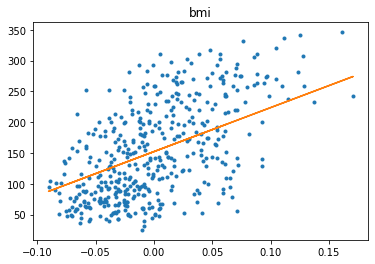

In [97]:
plt.plot(X_bmi,Y,".")
plt.plot(X_bmi,f.predict(X_bmi.reshape(-1,1)))
plt.title("bmi")

Text(0.5, 1.0, 'dp')

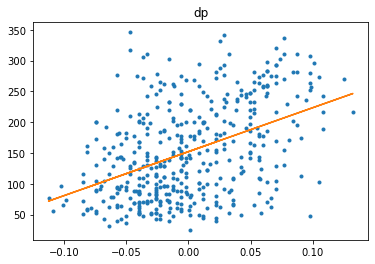

In [98]:
plt.plot(X_p,Y,".")
plt.plot(X_p,f.predict(X_p.reshape(-1,1)))
plt.title("dp")

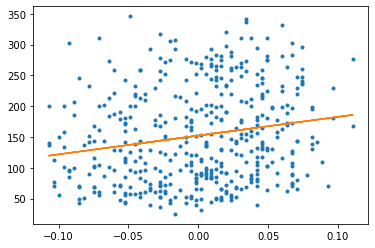

In [99]:
plt.plot(X_age,Y,'.')
plt.plot(X_age,lin(a,b,X_age),'')